# 2 body 
It is here assumed that the sun is at standstill

In [1]:
import pysindy as ps
import numpy as np
import matplotlib.pyplot as plt
from pysindy.feature_library import CustomLibrary

def plot(x, y, x_model, y_model):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5.5))
    ax[0].plot(x, y, label='Data')
    ax[1].plot(x_model, y_model, label='SINDy')
    ax[0].set(xlabel='x', ylabel='y')
    ax[1].set(xlabel='x', ylabel='y')
    ax[0].legend()
    ax[1].legend()
    
pos = np.load('Jupiter_pos.npy')
x, y = pos[:, 0], pos[:, 1]
vel = np.load('Jupiter_vel.npy')
acc = np.load('Jupiter_acc.npy')
ax, ay = acc[:, 0], acc[:, 1]

In [2]:
functions = [lambda x,y : x/(x**2+y**2)**(3/2), 
             lambda x,y : y/(x**2+y**2)**(3/2)]

lib_custom = CustomLibrary(library_functions=functions)
optimizer = ps.STLSQ(threshold=1)

t = np.arange(0, pos.shape[0], 1)

model = ps.SINDy( 
        feature_library = lib_custom, 
        optimizer=optimizer,
        feature_names = ['x', 'y'])

model.fit(pos, t=t, x_dot=acc)
model.print()
coef = model.coefficients()

x' = -39.407 f0(x,y)
y' = -39.411 f1(x,y)


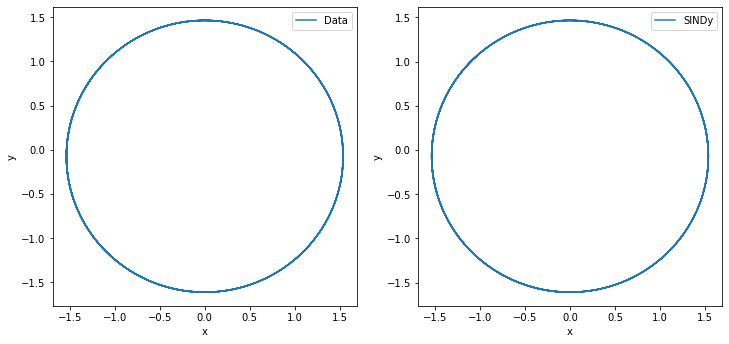

In [3]:
def f0(x, y):
    F0 = x/(x**2+y**2)**(3/2)
    return F0
    
def f1(x, y):
    F1 = y/(x**2+y**2)**(3/2)
    return F1

aSx, aSy = coef[0,0]*f0(x, y), coef[1,1]*f1(x, y)

plot(ax, ay, aSx, aSy)
plt.savefig('1_body.png')

In [34]:
#plt.savefig('2_body.png')

Now not assuming the sun is at standstill

In [30]:
pos = np.load('Jupiter_Sun_pos.npy')
xs, ys = pos[:, 0], pos[:, 1]
xj, yj = pos[:, 2], pos[:, 3]
vel = np.load('Jupiter_Sun_vel.npy')
acc = np.load('Jupiter_Sun_acc.npy')
axs, ays = acc[:, 0], acc[:, 1]
axj, ayj = acc[:, 2], acc[:, 3]

functions = [lambda x1, y1, x2, y2: (x2-x1)/((x2-x1)**2+(y2-y1)**2)**(3/2), 
             lambda x1, y1, x2, y2: (y2-y1)/((x2-x1)**2+(y2-y1)**2)**(3/2)]

optimizer = ps.STLSQ(threshold=1e-2)
t = np.arange(0, pos.shape[0], 1)

model = ps.SINDy( 
        feature_library = lib_custom, 
        optimizer=optimizer,
        feature_names = ['x1', 'y1', 'x2', 'y2'])

model.fit(pos, t=t, x_dot=acc)
model.print()
coef = model.coefficients()
print(coef)
print(coef.shape)

x1' = 0.038 f0(x2,y2)
y1' = 0.038 f1(x2,y2)
x2' = -39.407 f0(x2,y2) + 0.018 f1(x2,y2)
y2' = -0.021 f0(x2,y2) + -39.410 f1(x2,y2)
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  3.76242162e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  3.76281184e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -3.94070470e+01  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  1.78476404e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.08317156e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.94104545e+01]]
(4, 12)


C:\Users\tobia\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.22066e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\tobia\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.22066e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\tobia\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.22066e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\tobia\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.22066e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


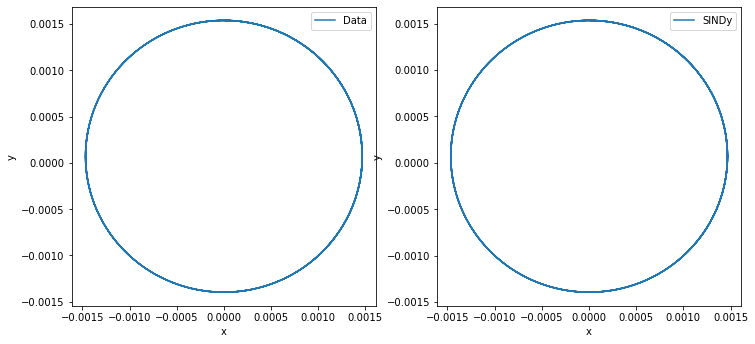

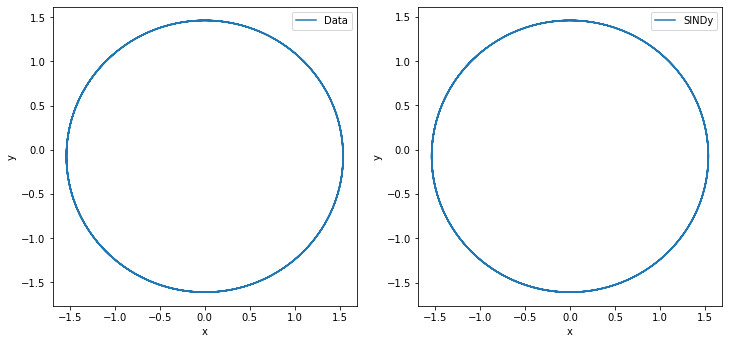

In [33]:
def f0(x1, y1, x2, y2):
    F0 = (x2-x1)/((x2-x1)**2+(y2-y1)**2)**(3/2)
    return F0
    
def f1(x1, y1, x2, y2):
    F1 = (y2-y1)/((x2-x1)**2+(y2-y1)**2)**(3/2)
    return F1

a1, a2, a3, a4 = coef[0,5]*f0(xs, ys, xj, yj), coef[1,11]*f1(xs, ys, xj, yj), coef[2,5]*f0(xs, ys, xj, yj), coef[3,11]*f1(xs, ys, xj, yj)

plot(axs, ays, a1, a2)
plot(axj, ayj, a3, a4)

In [36]:
import plot3.py

ModuleNotFoundError: No module named 'plot3'